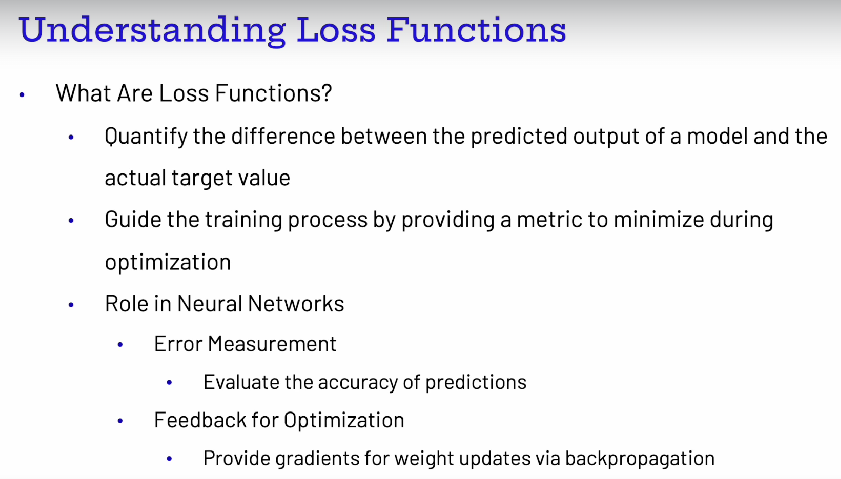
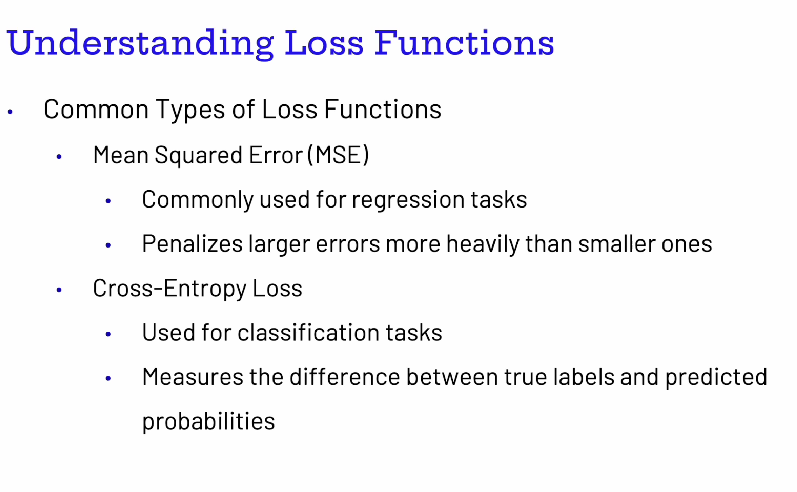
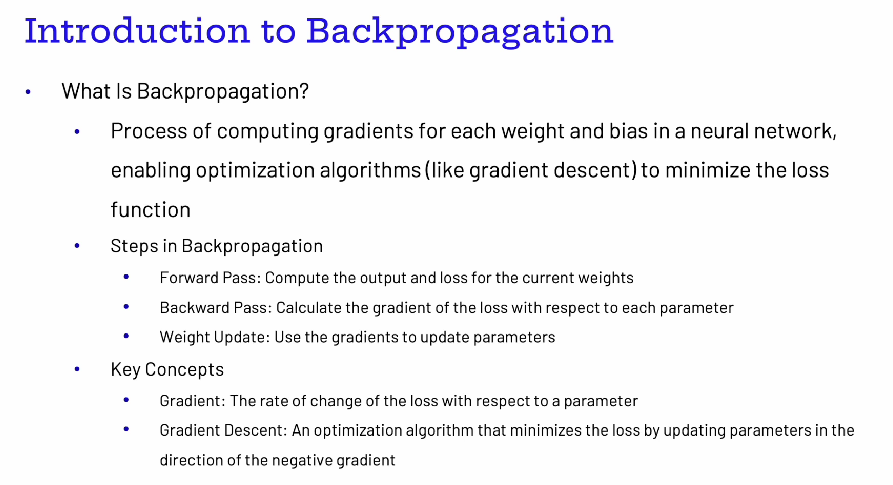

In [1]:
import numpy as np

In [4]:
# mse loss
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# binary cross entropy(BCE) loss
    # np.clip(x, a_min, a_max)
        # - This function in NumPy "clips" (limits) the values in an array.
        # - Any value in x smaller than a_min is replaced with a_min.
        # - Any value in x greater than a_max is replaced with a_max.
        # - Values between a_min and a_max stay the same.
def binary_cross_entropy_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [5]:
y_true = np.array([1,0,1,1])
y_pred = np.array([0.9,0.2,0.8,0.7])

mse = mse_loss(y_true, y_pred)
bce = binary_cross_entropy_loss(y_true,y_pred)

print(f"MSE loss: {mse:4f}")
print(f"BCE loss: {bce:4f}")


MSE loss: 0.045000
BCE loss: 0.227081


In [6]:
# derivative of MSE Loss:
def mse_gradient(y_true , y_pred ):
    return 2*(y_pred - y_true) /len(y_true)

# derivative of BCE loss 
def bce_gradient(y_true,y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return (y_pred - y_true) / (y_pred * (1 - y_pred))



In [8]:
grad_mse = mse_gradient(y_true, y_pred)
grad_bce = bce_gradient(y_true, y_pred)

print(f"MSE gradient {grad_mse}")
print(f"BCE gradient {grad_bce}")



MSE gradient [-0.05  0.1  -0.1  -0.15]
BCE gradient [-1.11111111  1.25       -1.25       -1.42857143]


In [9]:
import matplotlib.pyplot as plt   

# defining prediction and true labels 
predictions = np.linspace(0,1,100)
true_label = 1

# compute losses
mse_losses = [(true_label - p)**2 for p in predictions]
bce_losses = [-true_label * np.log(max(p, 1e-15)) - (1 - true_label)* np.log(max(1-p , 1e-15)) for p in predictions]





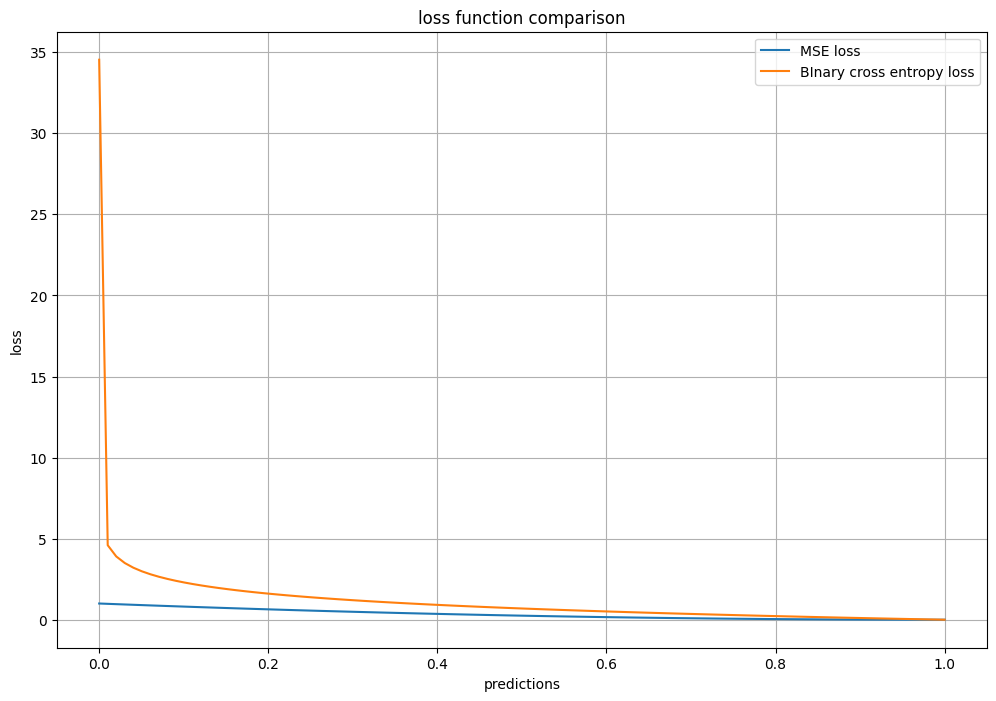

In [12]:
# plot 
plt.figure(figsize=(12,8))
plt.plot(predictions, mse_losses, label="MSE loss")
plt.plot(predictions, bce_losses, label="BInary cross entropy loss")
plt.title("loss function comparison")
plt.xlabel('predictions')
plt.ylabel("loss")
plt.grid(True)
plt.legend()
plt.show()